In [18]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Read data
data_users = pd.read_csv('data/takehome_users.csv', encoding='latin-1')
print(data_users.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [20]:
data_eng = pd.read_csv('data/takehome_user_engagement.csv', parse_dates={'Date_time' : [0]})
print(data_eng.head())

            Date_time  user_id  visited
0 2014-04-22 03:53:30        1        1
1 2013-11-15 03:45:04        2        1
2 2013-11-29 03:45:04        2        1
3 2013-12-09 03:45:04        2        1
4 2013-12-25 03:45:04        2        1


In [21]:
data_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [22]:
data_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [23]:
#Get unique timestamps per user per day
data_eng['Date'] = data_eng['Date_time'].dt.date
data_eng.drop(['Date_time'], axis=1, inplace=True)
data_eng.drop_duplicates()
print(data_eng.head())

   user_id  visited        Date
0        1        1  2014-04-22
1        2        1  2013-11-15
2        2        1  2013-11-29
3        2        1  2013-12-09
4        2        1  2013-12-25


In [24]:
#Filter users with less than 3 logins - Removing login data, not user data
data_final = data_eng.groupby(['user_id']).filter(lambda x: x['user_id'].count()>=3)
data_final.reset_index(drop=True, inplace=True)
print(data_final.head())

   user_id  visited        Date
0        2        1  2013-11-15
1        2        1  2013-11-29
2        2        1  2013-12-09
3        2        1  2013-12-25
4        2        1  2013-12-31


In [25]:
#TESTING ONLY
#users = data_final['user_id'].unique()
#print(users)
data_result = data_final[data_final['user_id']==2]
print(data_result)
print(data_result.shape[0])
diff = (data_result.Date[11]-data_result.Date[10]).days
print(diff)

    user_id  visited        Date
0         2        1  2013-11-15
1         2        1  2013-11-29
2         2        1  2013-12-09
3         2        1  2013-12-25
4         2        1  2013-12-31
5         2        1  2014-01-08
6         2        1  2014-02-03
7         2        1  2014-02-08
8         2        1  2014-02-09
9         2        1  2014-02-13
10        2        1  2014-02-16
11        2        1  2014-03-09
12        2        1  2014-03-13
13        2        1  2014-03-31
14
21


In [26]:
def get_freq_users(login_data, interval):
    frequent_users = []
    users = login_data['user_id'].unique()
    for user in users:
        data_user = login_data[login_data['user_id']==user]
        data_user.reset_index(drop=True, inplace=True)
        user_data_len = data_user.shape[0]
        i=0
        while(i <(user_data_len-interval)):
            diff = (data_user.Date[i+interval]-data_user.Date[i]).days
            if (diff <=7):
                frequent_users.append(user)
                break
            i+=1
    return frequent_users

freq_users = get_freq_users(data_final,2)

In [27]:
#Add frequent user data to users table
data_users['Freq_user_bool'] = data_users['object_id'].isin(freq_users)
data_users['Freq_user'] = np.where(data_users['Freq_user_bool']==True, 1, 0)

In [29]:
print(data_users.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [30]:
#Creation Source 
creation_source_cat = data_users[["creation_source"]]
creation_source_cat.head(10)

,creation_source
0,GUEST_INVITE
1,ORG_INVITE
2,ORG_INVITE
3,GUEST_INVITE
4,GUEST_INVITE
5,GUEST_INVITE
6,SIGNUP
7,PERSONAL_PROJECTS
8,PERSONAL_PROJECTS
9,ORG_INVITE


In [31]:
#Prepare data for algorithm
#1 - Encode Creation Source

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_users['creation_source_encoded'] = ordinal_encoder.fit_transform(creation_source_cat)
data_users['creation_source_encoded'][:10]

#from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
#data_users['creation_source_encoded'] = cat_encoder.fit_transform(creation_source_cat)


0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
6    3.0
7    2.0
8    2.0
9    1.0
Name: creation_source_encoded, dtype: float64

In [32]:
data_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Freq_user_bool,Freq_user,creation_source_encoded
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,1,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,0,0.0


In [34]:
#Fill Nan in invited_by_user_id
data_users['invited_by_user_id'].fillna(0, inplace=True)
data_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Freq_user_bool,Freq_user,creation_source_encoded
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,1,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,0,0.0


In [35]:
#Pick features
features_list = ['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_encoded']
features = data_users[features_list]
features.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_encoded
0,1,0,11,10803.0,0.0
1,0,0,1,316.0,1.0
2,0,0,94,1525.0,1.0
3,0,0,1,5151.0,0.0
4,0,0,193,5240.0,0.0


In [36]:
#Target variable - Frequent user
target= data_users['Freq_user']

In [37]:
#Get test and train sets
def split_train_test(data, train_ratio):
    indices = np.arange(len(data))
    train_set_size = int(len(data) * train_ratio)
    train_indices = indices[:train_set_size]
    test_indices = indices[train_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

X_train_set, X_test_set = split_train_test(features, 0.8)

In [38]:
print(len(X_train_set))
print(len(X_test_set))
print("Training Series:", "\n", X_train_set.head(), "\n")
print("Training Series:", "\n", X_train_set.tail(), "\n")
print("Testing Series:", "\n", X_test_set.head())
print("Testing Series:", "\n", X_test_set.tail())

9600
2400
Training Series: 
    opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  creation_source_encoded  
0             10803.0                      0.0  
1               316.0                      1.0  
2              1525.0                      1.0  
3              5151.0                      0.0  
4              5240.0                      0.0   

Training Series: 
       opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
9595                         0                           0      68   
9596                         0                           0      33   
9597                         0             

In [39]:
y_train_set, y_test_set = split_train_test(target, 0.8)

In [40]:
#SKIP
print(len(y_train_set))
print(len(y_test_set))
print("Training Series:", "\n", y_train_set.head(), "\n")
print("Training Series:", "\n", y_train_set.tail(), "\n")
print("Testing Series:", "\n", y_test_set.head())
print("Testing Series:", "\n", y_test_set.tail())

9600
2400
Training Series: 
 0    0
1    1
2    0
3    0
4    0
Name: Freq_user, dtype: int32 

Training Series: 
 9595    0
9596    1
9597    0
9598    0
9599    0
Name: Freq_user, dtype: int32 

Testing Series: 
 9600    1
9601    0
9602    0
9603    0
9604    0
Name: Freq_user, dtype: int32
Testing Series: 
 11995    0
11996    0
11997    0
11998    0
11999    0
Name: Freq_user, dtype: int32


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
#model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [10, 20, 30, 40, 50]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')


CV_rfc.fit(X_train_set,y_train_set.values.ravel())
y_model = CV_rfc.predict(X_test_set)

In [42]:
print (CV_rfc.best_params_)
print (CV_rfc.best_score_)

{'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 300}
0.5172626519204665


In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test_set, y_model))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2054
           1       0.19      0.23      0.21       346

   micro avg       0.74      0.74      0.74      2400
   macro avg       0.53      0.53      0.53      2400
weighted avg       0.77      0.74      0.75      2400



[[1701  353]
 [ 265   81]]


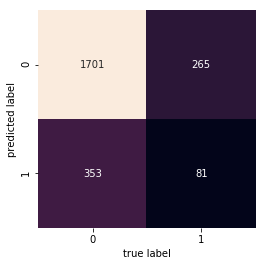

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_set, y_model)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
# Get numerical feature importances

importances = list(CV_rfc.best_estimator_.feature_importances_)
feature_list = list(features.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: org_id               Importance: 0.63
Variable: invited_by_user_id   Importance: 0.28
Variable: creation_source_encoded Importance: 0.05
Variable: opted_in_to_mailing_list Importance: 0.02
Variable: enabled_for_marketing_drip Importance: 0.02
